# Can you explain the price of electricity?

In [1]:
# import our packages
import scipy.stats as stats
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import seaborn as sns
from matplotlib.pyplot import plot
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import math
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import jupyterthemes
plt.style.use('ggplot')
pd.options.display.max_columns = None 

In [2]:
df = pd.read_csv('x_train.csv')
result = pd.read_csv('y_train.csv')

In [3]:
result

ID    TARGET
0     1054  0.028313
1     2049 -0.112516
2     1924 -0.180840
3      297 -0.260356
4     1101 -0.071733
...    ...       ...
1489   459 -0.172597
1490  1674 -0.063546
1491   748  0.151797
1492  1454 -0.640917
1493   359 -0.252764

[1494 rows x 2 columns]

In [4]:
df['TARGET'] = result['TARGET']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


In [6]:
df.describe()

ID       DAY_ID  DE_CONSUMPTION  FR_CONSUMPTION  \
count  1494.000000  1494.000000     1494.000000     1494.000000   
mean   1072.759036   591.861446        0.427442       -0.020032   
std     618.013179   345.065043        0.673412        0.918995   
min       0.000000     0.000000       -2.265563       -1.462350   
25%     540.250000   292.250000       -0.037421       -0.716771   
50%    1077.500000   591.000000        0.357061       -0.394166   
75%    1597.500000   885.750000        0.922057        0.650533   
max    2146.000000  1215.000000        2.033851        3.300640   

       DE_FR_EXCHANGE  FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  \
count     1469.000000     1469.000000    1370.000000    1424.000000   
mean        -0.145508        0.145508      -0.256332      -0.072643   
std          0.970226        0.970226       0.957443       1.075830   
min         -2.856874       -2.634831      -2.464849      -2.825331   
25%         -0.875213       -0.638867      -0.977214      -0.851500   
50%         -0.164287        0.164287      -0.306899       0.099455   
75%          0.638867        0.875213       0.452252       0.794843   
max          2.634831        2.856874       2.279619       1.951516   

       DE_NET_IMPORT  FR_NET_IMPORT       DE_GAS       FR_GAS      DE_COAL  \
count    1370.000000    1424.000000  1494.000000  1494.000000  1494.000000   
mean        0.256332       0.072643     0.780699     0.395019    -0.134330   
std         0.957443       1.075830     0.850190     0.906500     0.847285   
min        -2.279619      -1.951516    -1.117260    -1.317350    -1.491593   
25%        -0.452252      -0.794843     0.134947    -0.205078    -0.833046   
50%         0.306899      -0.099455     0.740006     0.256780    -0.246732   
75%         0.977214       0.851500     1.399461     1.090646     0.485761   
max         2.464849       2.825331     3.118082     2.372570     2.324889   

           FR_COAL     DE_HYDRO     FR_HYDRO   DE_NUCLEAR   FR_NUCLEAR  \
count  1494.000000  1494.000000  1494.000000  1494.000000  1494.000000   
mean     -0.434518     0.537398     0.105639    -0.468190    -0.446805   
std       0.506141     1.086330     1.057867     0.902468     0.964543   
min      -0.794950    -1.373985    -1.758523    -2.689387    -2.595326   
25%      -0.779098    -0.314520    -0.693892    -0.954908    -1.228912   
50%      -0.766389     0.330832    -0.138049    -0.097032    -0.327874   
75%      -0.262886     1.282374     0.776483     0.100720     0.143426   
max       1.905512     4.181936     3.730478     0.893087     1.854408   

          DE_SOLAR     FR_SOLAR   DE_WINDPOW   FR_WINDPOW   DE_LIGNITE  \
count  1494.000000  1494.000000  1494.000000  1494.000000  1494.000000   
mean      0.246707     0.608185     0.146337     0.398426    -0.298856   
std       1.069899     1.079398     1.064187     1.189404     0.851339   
min      -1.442296    -1.312588    -1.235802    -1.143277    -2.879041   
25%      -0.731345    -0.311343    -0.688284    -0.527749    -0.787239   
50%       0.211219     0.566797    -0.091336     0.007051    -0.188300   
75%       1.158397     1.368670     0.644247     1.010071     0.273510   
max       2.696571     3.648905     3.509017     4.965793     1.586885   

       DE_RESIDUAL_LOAD  FR_RESIDUAL_LOAD      DE_RAIN      FR_RAIN  \
count       1494.000000       1494.000000  1400.000000  1400.000000   
mean           0.071633         -0.153688    -0.037831     0.019357   
std            0.851499          0.896325     0.984233     1.051781   
min           -2.613569         -1.678936    -2.128531    -1.726420   
25%           -0.422896         -0.802333    -0.642117    -0.503927   
50%            0.151799         -0.460160    -0.274901    -0.228147   
75%            0.621209          0.382191     0.335237     0.154351   
max            2.539576          2.918326     7.756118     9.473201   

           DE_WIND      FR_WIND      DE_TEMP      FR_TEMP      GAS_RET  \
count  1400.000000  1

The columns ID in X_train et Y_train are identical, and the same holds true for the testing data. 1494 rows are available for the training data sets while 654 observations are used for the test data sets.

Input data sets comprise 35 columns:

1. ID: Unique row identifier, associated with a day (DAY_ID) and a country (COUNTRY),
2. DAY_ID: Day identifier - dates have been anonymized, but all data corresponding to a specific day is consistent,
3. COUNTRY: Country identifier - DE = Germany, FR = France,
and then contains daily commodity price variations,

4. GAS_RET: European gas,
5. COAL_RET: European coal,
6. CARBON_RET: Carbon emissions futures,
weather measures (daily, in the country x),

7. x_TEMP: Temperature,
8. x_RAIN: Rainfall,
9. x_WIND: Wind,
energy production measures (daily, in the country x),

10. x_GAS: Natural gas,
11. x_COAL: Hard coal,
12. x_HYDRO: Hydro reservoir,
13. x_NUCLEAR: Daily nuclear production,
14. x_SOLAR: Photovoltaic,
15. x_WINDPOW: Wind power,
16. x_LIGNITE: Lignite,
and electricity use metrics (daily, in the country x),

17. x_CONSUMPTON: Total electricity consumption,
18. x_RESIDUAL_LOAD: Electricity consumption after using all renewable energies,
19. x_NET_IMPORT: Imported electricity from Europe,
20. x_NET_EXPORT: Exported electricity to Europe,
21. DE_FR_EXCHANGE: Total daily electricity exchange between Germany and France,
22. FR_DE_EXCHANGE: Total daily electricity exchange between France and Germany.

In [7]:
df = df[[#'ID', 'DAY_ID', 
         #'COUNTRY', 
       'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'TARGET']].copy()

In [8]:
# fill in missing values with median
df.isna().sum()

DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
TARGET                0
dtype: int64

In [9]:
df['DE_FR_EXCHANGE'].fillna(df['DE_FR_EXCHANGE'].median(), inplace=True)
df['FR_DE_EXCHANGE'].fillna(df['FR_DE_EXCHANGE'].median(), inplace=True)
df['DE_NET_EXPORT'].fillna(df['DE_NET_EXPORT'].median(), inplace=True)
df['FR_NET_EXPORT'].fillna(df['FR_NET_EXPORT'].median(), inplace=True)
df['DE_NET_IMPORT'].fillna(df['DE_NET_IMPORT'].median(), inplace=True)
df['FR_NET_IMPORT'].fillna(df['FR_NET_IMPORT'].median(), inplace=True)
df['DE_RAIN'].fillna(df['DE_RAIN'].median(), inplace=True)
df['FR_RAIN'].fillna(df['FR_RAIN'].median(), inplace=True)
df['DE_WIND'].fillna(df['DE_WIND'].median(), inplace=True)
df['FR_WIND'].fillna(df['FR_WIND'].median(), inplace=True)
df['DE_TEMP'].fillna(df['DE_TEMP'].median(), inplace=True)
df['FR_TEMP'].fillna(df['FR_TEMP'].median(), inplace=True)

In [10]:
df.isna().sum()

DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
TARGET              0
dtype: int64

In [11]:
df.head()

DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  FR_DE_EXCHANGE  \
0        0.210099       -0.427458       -0.606523        0.606523   
1       -0.022399       -1.003452       -0.022063        0.022063   
2        1.395035        1.978665        1.021305       -1.021305   
3       -0.983324       -0.849198       -0.839586        0.839586   
4        0.143807       -0.617038       -0.924990        0.924990   

   DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  FR_NET_IMPORT    DE_GAS  \
0      -0.306899       0.692860       0.306899      -0.692860  0.441238   
1      -0.573520      -1.130838       0.573520       1.130838  0.174773   
2      -0.622021      -1.682587       0.622021       1.682587  2.351913   
3      -0.270870       0.563230       0.270870      -0.563230  0.487818   
4      -0.306899       0.990324       0.306899      -0.990324  0.238693   

     FR_GAS   DE_COAL   FR_COAL  DE_HYDRO  FR_HYDRO  DE_NUCLEAR  FR_NUCLEAR  \
0 -0.213766  0.740627  0.288782  2.209047  0.207838    0.709614   -0.190463   
1  0.426940 -0.170392 -0.762153  0.187964 -0.807112   -1.882740   -2.185961   
2  2.122241  1.572267  0.777053 -0.108578  0.779142   -1.897109    0.735137   
3  0.194659 -1.473817 -0.786025 -0.368417  1.320483   -0.205547   -1.589554   
4 -0.240862  1.003734 -0.274975 -0.230179 -0.795983   -0.005581    0.176935   

   DE_SOLAR  FR_SOLAR  DE_WINDPOW  FR_WINDPOW  DE_LIGNITE  DE_RESIDUAL_LOAD  \
0  0.101766  1.248911   -0.573370   -0.269460    0.870344          0.626666   
1  1.987428  3.237380   -0.035514   -0.107350   -0.194308         -0.395469   
2 -1.115583 -0.371039   -0.298755   -0.141239    0.428272          1.336625   
3  1.751523  0.562944   -0.010090    0.366885   -2.330557         -1.191889   
4  0.693543  0.723587   -0.774941   -0.564498    0.691040          0.571613   

   FR_RESIDUAL_LOAD   DE_RAIN   FR_RAIN   DE_WIND   FR_WIND   DE_TEMP  \
0         -0.444661 -0.172680 -0.556356 -0.790823 -0.283160 -1.069070   
1         -1.183194 -1.240300 -0.770457  1.522331  0.828412  0.437419   
2          1.947273 -0.480700 -0.313338  0.431134  0.487608  0.684884   
3         -0.976974 -1.114838 -0.507570 -0.499409 -0.236249  0.350938   
4         -0.526267 -0.541465 -0.424550 -1.088158 -1.011560  0.614338   

    FR_TEMP   GAS_RET  COAL_RET  CARBON_RET    TARGET  
0 -0.063404  0.339041  0.124552   -0.002445  0.028313  
1  1.831241 -0.659091  0.047114   -0.490365 -0.112516  
2  0.114836  0.535974  0.743338    0.204952 -0.180840  
3 -0.417514  0.911652 -0.296168    1.073948 -0.260356  
4  0.729495  0.245109  1.526606    2.614378 -0.071733

In [12]:
X = np.array(df[[#'ID', 'DAY_ID', 
         #'COUNTRY', 
       'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       #'TARGET'
]]).copy()
y = np.array(df[['TARGET']])

In [45]:
# We will create a linear regression to use as our baseline comparison model
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2,
                                                                           random_state=20
                                                                           )

In [46]:
from sklearn.linear_model import LinearRegression

model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
spearman_corr = stats.spearmanr(y_test,pred)
print(f'The spearman correlation for a linear regression is: {spearman_corr.statistic}')

The spearman correlation for a linear regression is: 0.12000635677566639


# Exploratory Data Analysis & Feature Engineering

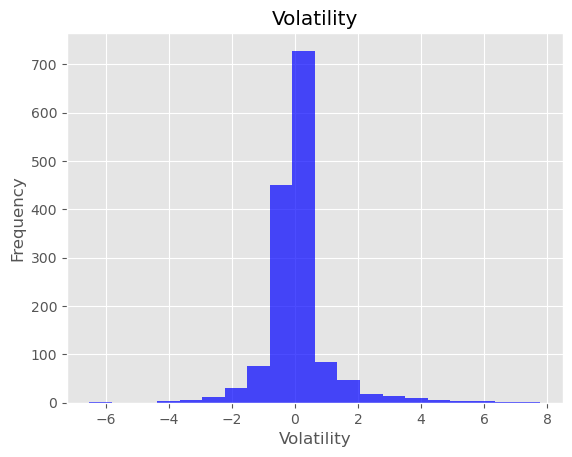

In [15]:
plot = plt.hist(df['TARGET'],bins=20, color='blue', alpha=0.7)
plt.title('Volatility')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show(plot)

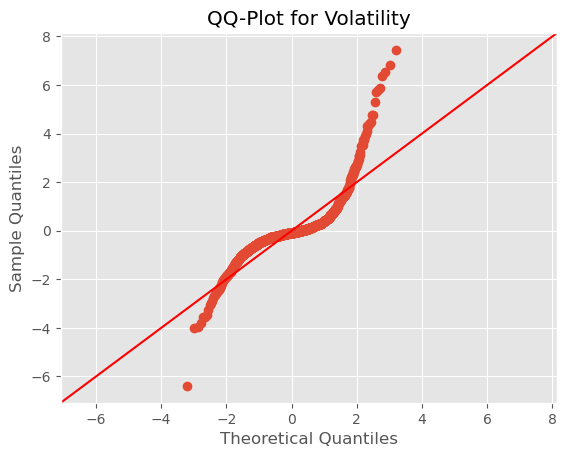

In [16]:
test = sm.qqplot(df['TARGET'], line='45', fit=True) #plot a qqplot for our label variable
plt.title('QQ-Plot for Volatility')
plt.show(test)

/Users/benjamincheng/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


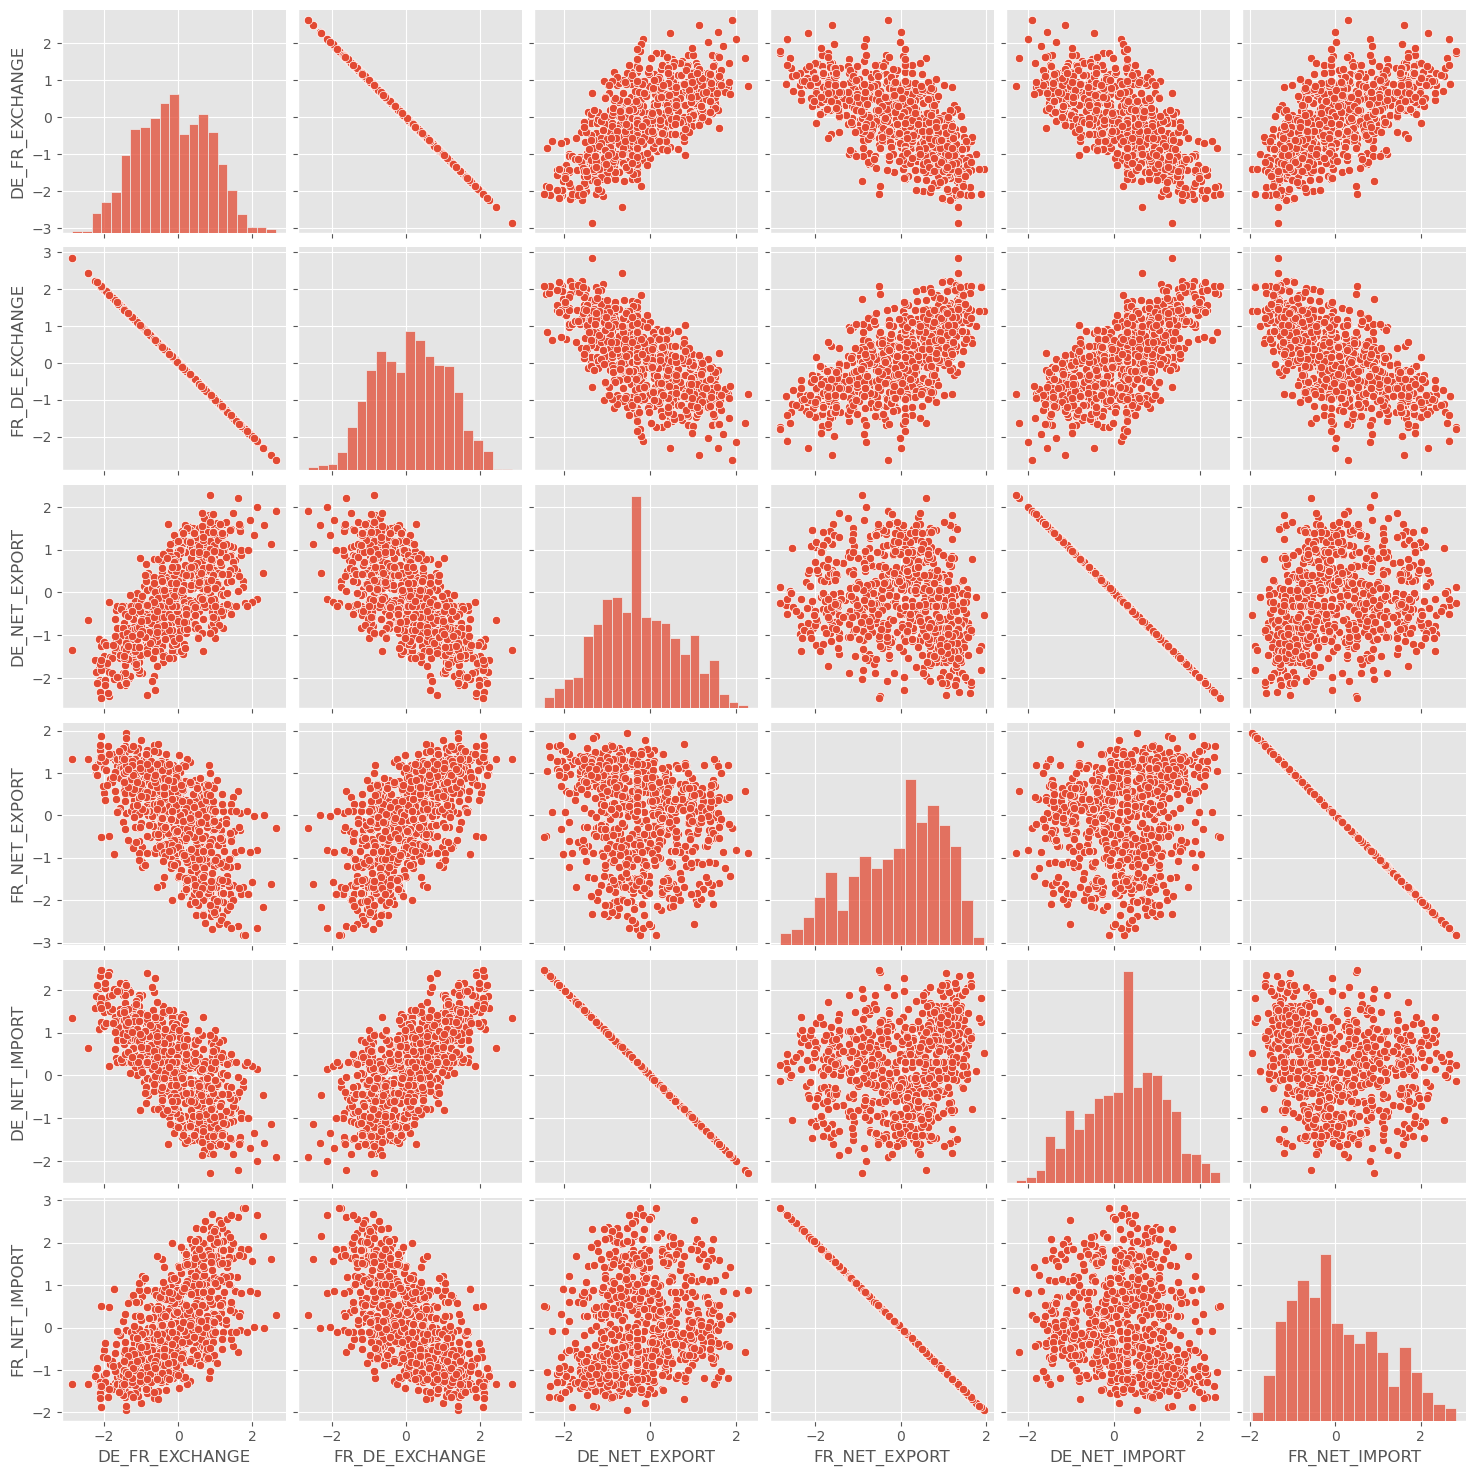

In [17]:
pair = sns.pairplot(df, vars=['DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT'])

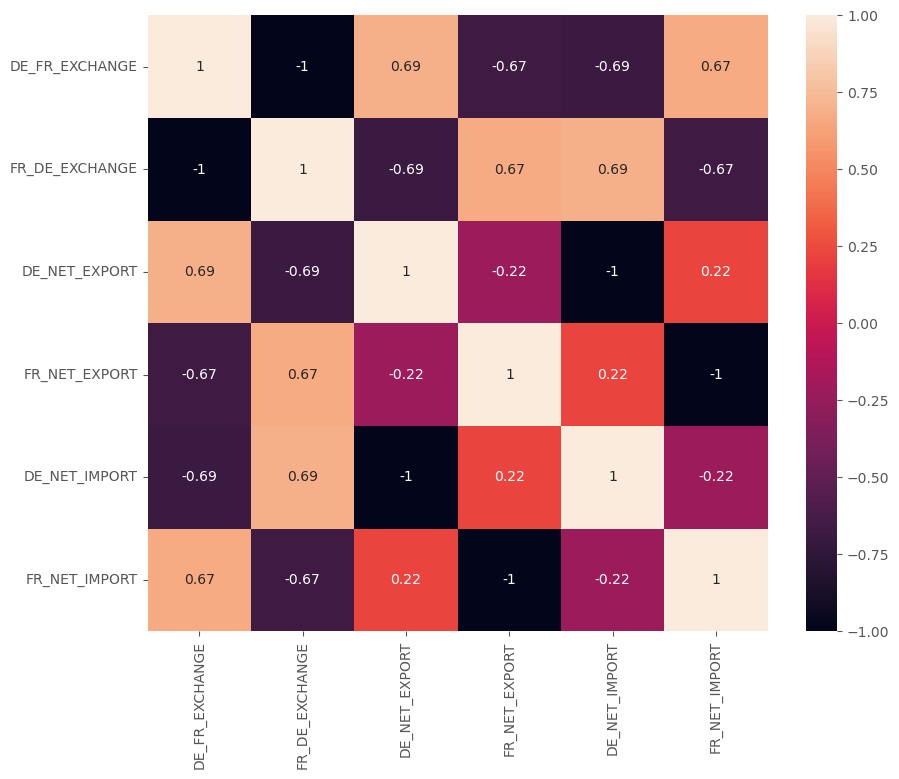

In [18]:
df_corr = df[['DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT']].corr()
plt.figure(figsize=(10, 8))
heat = sns.heatmap(df_corr,annot=True)
plt.show(heat)

In [19]:
# drop features that have a indirect relationship
df.drop(['DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT'], axis=1, inplace=True)

/Users/benjamincheng/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


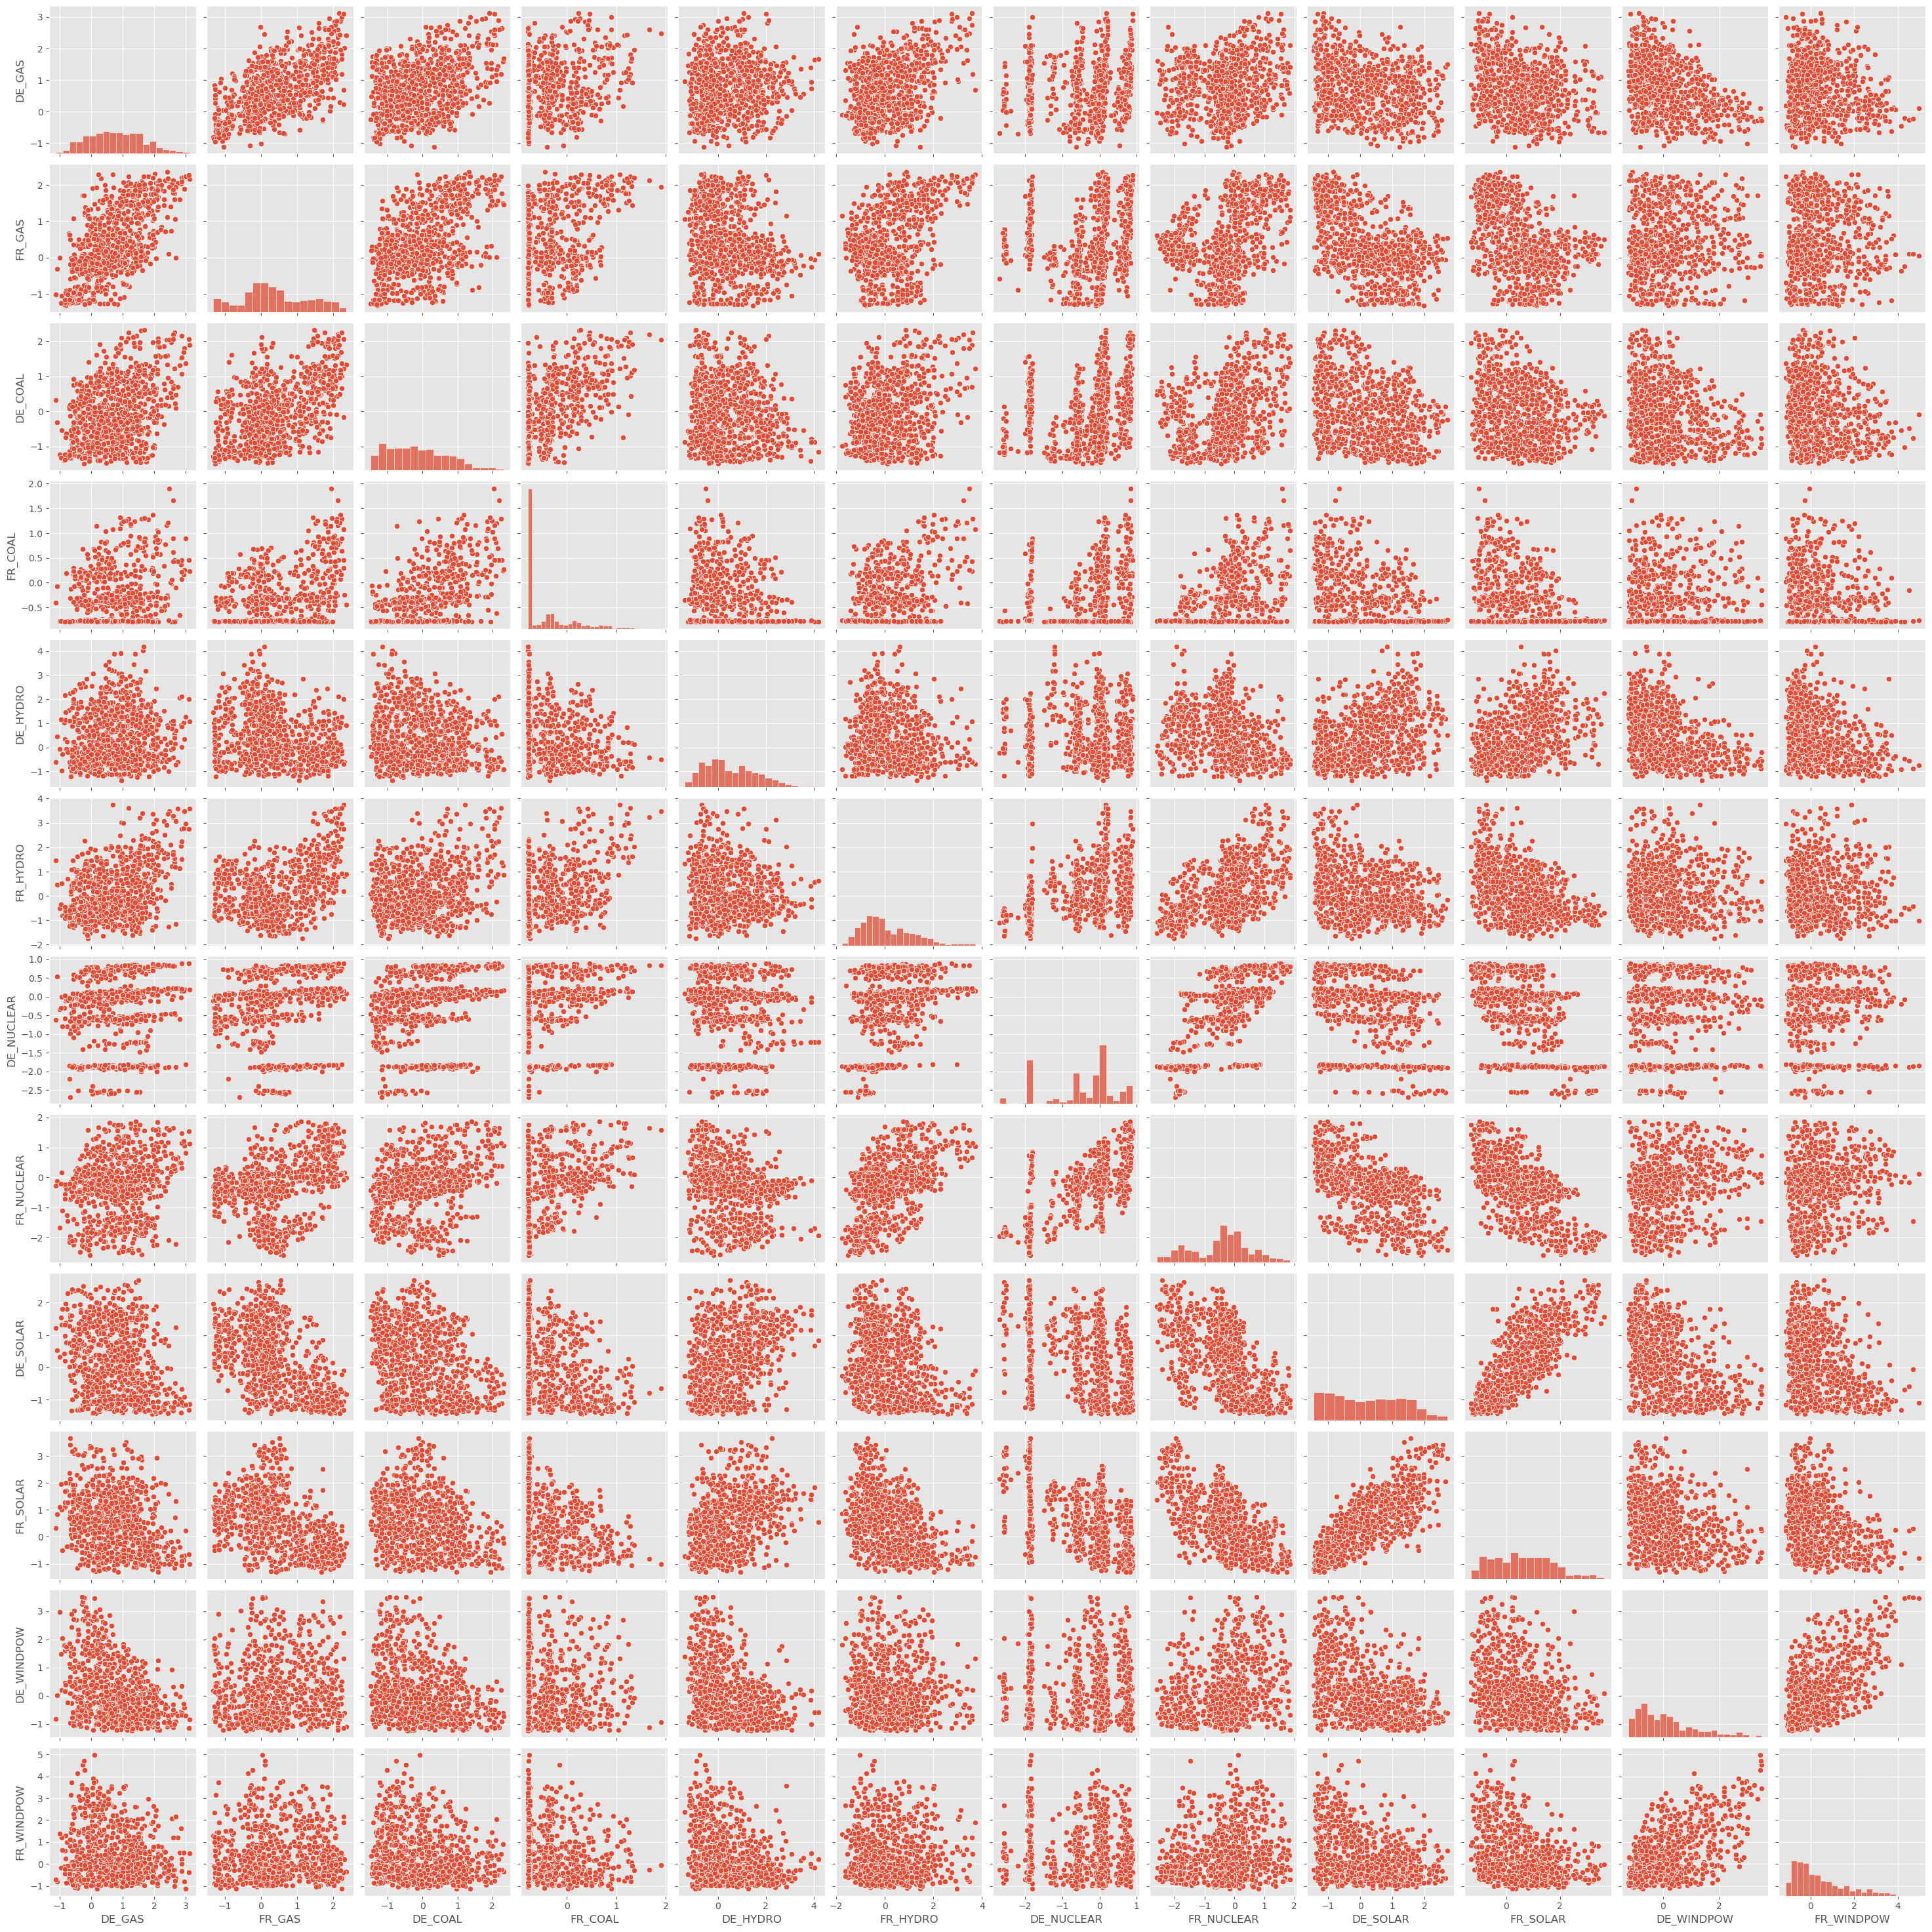

In [20]:
pair = sns.pairplot(df, vars=['DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO','FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR','DE_WINDPOW', 'FR_WINDPOW'])

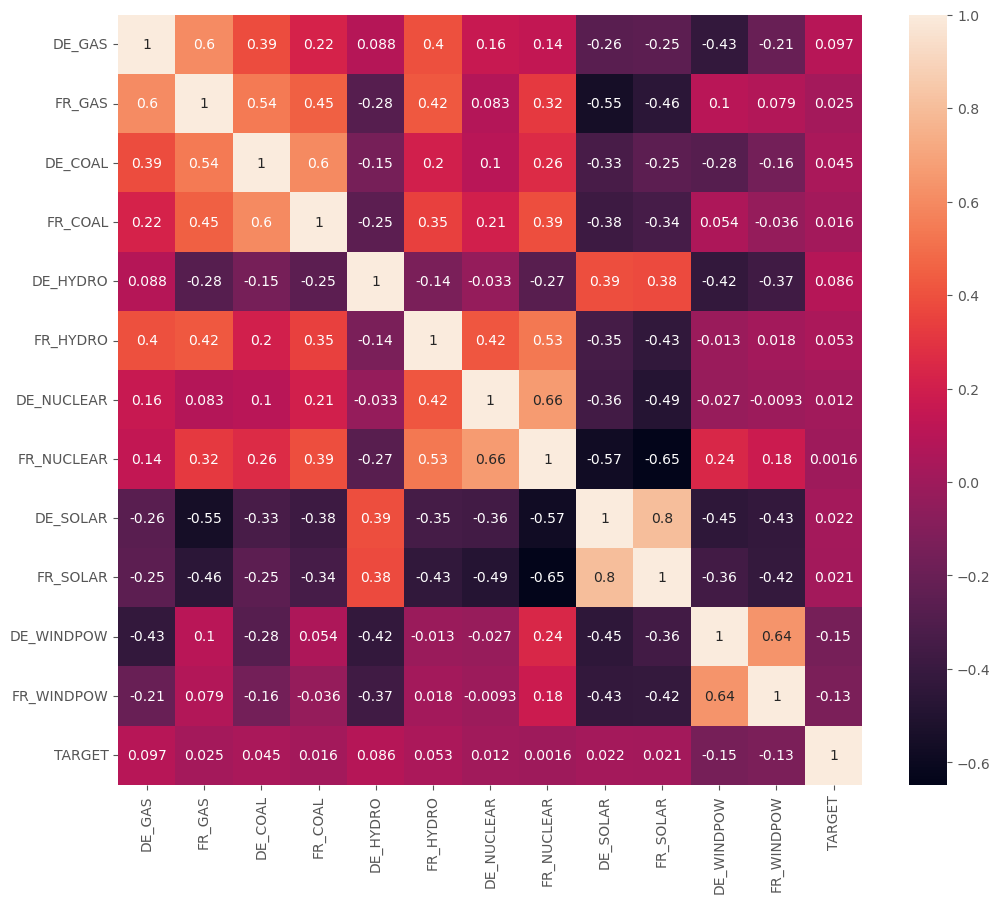

In [21]:
df_corr= df[['DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO',
       'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR','DE_WINDPOW', 'FR_WINDPOW', 'TARGET']].corr()
plt.figure(figsize=(12, 10))
heat = sns.heatmap(df_corr,annot=True)
plt.show(heat)

# Feature Engineering

In [22]:
# define a function that returns the skewness of data
def skew(x):
    difference_v = []
    difference_s = []
    mean = x.mean()
    for i in x:
        diff = (i - mean)**2
        difference_v.append(diff)
    
    v = (sum(difference_v)) / (len(x) - 1)
    
    for i in x:
        sk = (i - mean)**3
        difference_s.append(sk)
    
    skewness = (sum(difference_s)) / (len(x) * pow(v, 3/2))
    return skewness

In [23]:
# iterate over all our columns to print skew
skew_dict = {}
for i in df.columns:
    skew(df[i])
    skew_dict.update({i: skew(df[i])})
skew_dict

{'DE_CONSUMPTION': -0.0832331173862752,
 'FR_CONSUMPTION': 0.887946909449833,
 'FR_DE_EXCHANGE': -0.009215579048936159,
 'DE_NET_IMPORT': -0.1645061053047378,
 'FR_NET_IMPORT': 0.47595982460795627,
 'DE_GAS': 0.20070046137973985,
 'FR_GAS': 0.22011555499383237,
 'DE_COAL': 0.4900427144757779,
 'FR_COAL': 1.5570836682827383,
 'DE_HYDRO': 0.5887467816078934,
 'FR_HYDRO': 0.8599257643552266,
 'DE_NUCLEAR': -0.6672510114614207,
 'FR_NUCLEAR': -0.18751758578970934,
 'DE_SOLAR': 0.17102131649573396,
 'FR_SOLAR': 0.3667394271334896,
 'DE_WINDPOW': 1.0451446568129656,
 'FR_WINDPOW': 1.1262070206434138,
 'DE_LIGNITE': -0.6370886566553232,
 'DE_RESIDUAL_LOAD': -0.3293971095106682,
 'FR_RESIDUAL_LOAD': 1.0182770107568833,
 'DE_RAIN': 1.9404062087972327,
 'FR_RAIN': 3.457398346185584,
 'DE_WIND': 1.6112793244671857,
 'FR_WIND': 1.1830437230976394,
 'DE_TEMP': -0.13017155450981133,
 'FR_TEMP': -0.26883253292408765,
 'GAS_RET': 0.09557888373889686,
 'COAL_RET': -0.42369702394053027,
 'CARBON_RET': 0

In [24]:
# Create transformations for our data to eliminate skew
def transform(
        x, 
        distance=0.01):
    # perform a linear transformation on data 
    shift = x.name + "_SHIFT"
    df[shift] = None
    df[shift] = abs(x.min()) + x + distance
    
    x = df[shift]
    ab = []
    name_log = x.name + '_LOG'
    name_sqrt = x.name + '_SQRT'
    name_square = x.name + '_SQ'
    
    # calculate which transformation will yield lowest absolute skew
    ab_transformed_log = abs(skew(np.log(x)))
    ab.append(ab_transformed_log)
    ab_transformed_sqrt = abs(skew(np.sqrt(x)))
    ab.append(ab_transformed_sqrt)
    ab_transformed_square = abs(skew(pow(x, 2)))
    ab.append(ab_transformed_square)
    
    min_list = min(ab)
    min_loca = ab.index(min_list)
    
    if min_loca == 0:
        skew_value = skew(np.log(x))
        df[name_log] = np.log(x)
        df.drop(shift, axis=1, inplace=True)
        return name_log, skew_value
    elif min_loca == 1:
        skew_value = skew(np.sqrt(x))
        df[name_sqrt] = np.sqrt(x)
        df.drop(shift, axis=1, inplace=True)
        return name_sqrt, skew_value
    else:
        skew_value = skew(x**2)
        df[name_square] = pow(x, 2)
        df.drop(shift, axis=1, inplace=True)
        return name_square, skew_value

In [25]:
skew_dict

{'DE_CONSUMPTION': -0.0832331173862752,
 'FR_CONSUMPTION': 0.887946909449833,
 'FR_DE_EXCHANGE': -0.009215579048936159,
 'DE_NET_IMPORT': -0.1645061053047378,
 'FR_NET_IMPORT': 0.47595982460795627,
 'DE_GAS': 0.20070046137973985,
 'FR_GAS': 0.22011555499383237,
 'DE_COAL': 0.4900427144757779,
 'FR_COAL': 1.5570836682827383,
 'DE_HYDRO': 0.5887467816078934,
 'FR_HYDRO': 0.8599257643552266,
 'DE_NUCLEAR': -0.6672510114614207,
 'FR_NUCLEAR': -0.18751758578970934,
 'DE_SOLAR': 0.17102131649573396,
 'FR_SOLAR': 0.3667394271334896,
 'DE_WINDPOW': 1.0451446568129656,
 'FR_WINDPOW': 1.1262070206434138,
 'DE_LIGNITE': -0.6370886566553232,
 'DE_RESIDUAL_LOAD': -0.3293971095106682,
 'FR_RESIDUAL_LOAD': 1.0182770107568833,
 'DE_RAIN': 1.9404062087972327,
 'FR_RAIN': 3.457398346185584,
 'DE_WIND': 1.6112793244671857,
 'FR_WIND': 1.1830437230976394,
 'DE_TEMP': -0.13017155450981133,
 'FR_TEMP': -0.26883253292408765,
 'GAS_RET': 0.09557888373889686,
 'COAL_RET': -0.42369702394053027,
 'CARBON_RET': 0

In [26]:
#iternate through the all of the feature variables that will transform features that have skew > 1
for i in df.columns:
    if (skew(df[i])) > 1 and df[i].name != "TARGET":
        transform(df[i])

In [27]:
skew_dict = {}
for i in df.columns:
    skew(df[i])
    skew_dict.update({i: skew(df[i])})
skew_dict

{'DE_CONSUMPTION': -0.0832331173862752,
 'FR_CONSUMPTION': 0.887946909449833,
 'FR_DE_EXCHANGE': -0.009215579048936159,
 'DE_NET_IMPORT': -0.1645061053047378,
 'FR_NET_IMPORT': 0.47595982460795627,
 'DE_GAS': 0.20070046137973985,
 'FR_GAS': 0.22011555499383237,
 'DE_COAL': 0.4900427144757779,
 'FR_COAL': 1.5570836682827383,
 'DE_HYDRO': 0.5887467816078934,
 'FR_HYDRO': 0.8599257643552266,
 'DE_NUCLEAR': -0.6672510114614207,
 'FR_NUCLEAR': -0.18751758578970934,
 'DE_SOLAR': 0.17102131649573396,
 'FR_SOLAR': 0.3667394271334896,
 'DE_WINDPOW': 1.0451446568129656,
 'FR_WINDPOW': 1.1262070206434138,
 'DE_LIGNITE': -0.6370886566553232,
 'DE_RESIDUAL_LOAD': -0.3293971095106682,
 'FR_RESIDUAL_LOAD': 1.0182770107568833,
 'DE_RAIN': 1.9404062087972327,
 'FR_RAIN': 3.457398346185584,
 'DE_WIND': 1.6112793244671857,
 'FR_WIND': 1.1830437230976394,
 'DE_TEMP': -0.13017155450981133,
 'FR_TEMP': -0.26883253292408765,
 'GAS_RET': 0.09557888373889686,
 'COAL_RET': -0.42369702394053027,
 'CARBON_RET': 0

In [28]:
transform(df['FR_RAIN_SHIFT_SQRT'])

('FR_RAIN_SHIFT_SQRT_SHIFT_SQRT', 0.5030094512211305)

In [29]:
skew_dict = {}
for i in df.columns:
    skew(df[i])
    skew_dict.update({i: skew(df[i])})
skew_dict

{'DE_CONSUMPTION': -0.0832331173862752,
 'FR_CONSUMPTION': 0.887946909449833,
 'FR_DE_EXCHANGE': -0.009215579048936159,
 'DE_NET_IMPORT': -0.1645061053047378,
 'FR_NET_IMPORT': 0.47595982460795627,
 'DE_GAS': 0.20070046137973985,
 'FR_GAS': 0.22011555499383237,
 'DE_COAL': 0.4900427144757779,
 'FR_COAL': 1.5570836682827383,
 'DE_HYDRO': 0.5887467816078934,
 'FR_HYDRO': 0.8599257643552266,
 'DE_NUCLEAR': -0.6672510114614207,
 'FR_NUCLEAR': -0.18751758578970934,
 'DE_SOLAR': 0.17102131649573396,
 'FR_SOLAR': 0.3667394271334896,
 'DE_WINDPOW': 1.0451446568129656,
 'FR_WINDPOW': 1.1262070206434138,
 'DE_LIGNITE': -0.6370886566553232,
 'DE_RESIDUAL_LOAD': -0.3293971095106682,
 'FR_RESIDUAL_LOAD': 1.0182770107568833,
 'DE_RAIN': 1.9404062087972327,
 'FR_RAIN': 3.457398346185584,
 'DE_WIND': 1.6112793244671857,
 'FR_WIND': 1.1830437230976394,
 'DE_TEMP': -0.13017155450981133,
 'FR_TEMP': -0.26883253292408765,
 'GAS_RET': 0.09557888373889686,
 'COAL_RET': -0.42369702394053027,
 'CARBON_RET': 0

In [30]:
# lets remove all features that have been transformed
df.drop(['FR_COAL', 'DE_WINDPOW', 'FR_WINDPOW', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'FR_RAIN_SHIFT_SQRT'], axis=1, inplace=True)

In [31]:
# lets center and scale
for i in df.columns:
    if df[i].name != "TARGET":
        df[i] = (df[i] - df[i].mean()) / df[i].std()
    else:
        continue

## Lasso

In [32]:
df.shape

(1494, 30)

In [33]:
X=np.array(df[['DE_CONSUMPTION', 'FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'DE_NET_IMPORT',
       'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL', 'DE_HYDRO', 'FR_HYDRO',
       'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET',
       'CARBON_RET', 
               #'TARGET', 
               'FR_COAL_SHIFT_LOG', 'DE_WINDPOW_SHIFT_SQRT',
       'FR_WINDPOW_SHIFT_SQRT', 'FR_RESIDUAL_LOAD_SHIFT_SQRT',
       'DE_RAIN_SHIFT_SQRT', 'DE_WIND_SHIFT_SQRT', 'FR_WIND_SHIFT_SQRT',
       'FR_RAIN_SHIFT_SQRT_SHIFT_SQRT']]).copy()
y=np.array(df[['TARGET']]).copy()

In [34]:
# Seperate into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2,
                                                                           random_state=20
                                                                           )

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, make_scorer

# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.000001, 1, 0.00001)}
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso(max_iter=1000)

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf, scoring=mse_scorer)
lasso_cv.fit(X_train, y_train)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 0.015271000000000002}


In [36]:
model = Lasso(0.015271000000000002)
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = stats.spearmanr(y_test, pred).statistic
score

0.2005192264402014

In [37]:
names = list(df.drop('TARGET', axis=1).columns)
Lasso1 = Lasso(alpha=0.015271000000000002)
Lasso1.fit(X_train, y_train)
Lasso1_coeff = np.abs(Lasso1.coef_)
dropped_features = [name for name, coef in zip(names, Lasso1_coeff) if coef == 0]
print("Dropped Features:", dropped_features)
print(f'Number of Dropped Features: {len(dropped_features)}')

Dropped Features: ['FR_CONSUMPTION', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_SOLAR', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET', 'FR_COAL_SHIFT_LOG', 'DE_WINDPOW_SHIFT_SQRT', 'DE_RAIN_SHIFT_SQRT', 'FR_WIND_SHIFT_SQRT', 'FR_RAIN_SHIFT_SQRT_SHIFT_SQRT']
Number of Dropped Features: 19


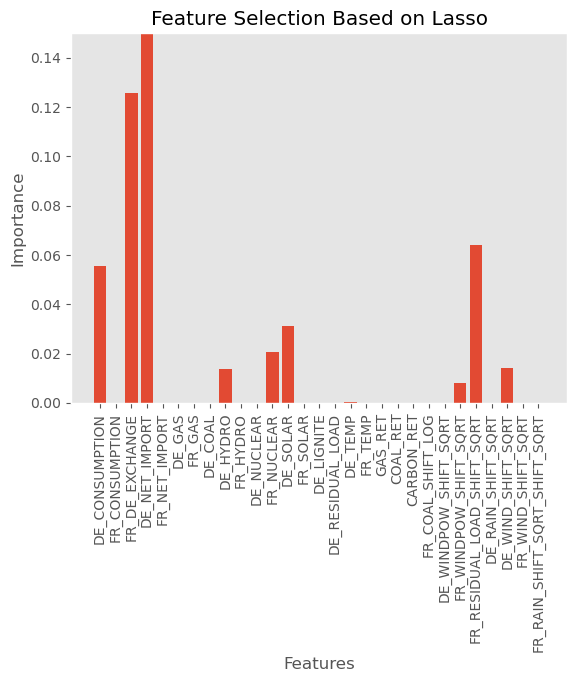

In [38]:
# plotting the Column Names and Importance of Columns. 
lasso_feature= df.drop(['TARGET','FR_CONSUMPTION', 'FR_NET_IMPORT', 
                        'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_HYDRO', 
                        'DE_NUCLEAR', 'FR_SOLAR', 'DE_LIGNITE', 
                        'DE_RESIDUAL_LOAD', 'FR_TEMP', 'GAS_RET', 
                        'COAL_RET', 'CARBON_RET', 'FR_COAL_SHIFT_LOG', 
                        'DE_WINDPOW_SHIFT_SQRT', 'DE_RAIN_SHIFT_SQRT', 
                        'FR_WIND_SHIFT_SQRT', 'FR_RAIN_SHIFT_SQRT_SHIFT_SQRT'], axis=1)
plt.bar(names, Lasso1_coeff)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [39]:
# Save Lasso npy
X_lasso_numpy = np.array(df.drop(['TARGET','FR_CONSUMPTION', 'FR_NET_IMPORT', 
                        'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_HYDRO', 
                        'DE_NUCLEAR', 'FR_SOLAR', 'DE_LIGNITE', 
                        'DE_RESIDUAL_LOAD', 'FR_TEMP', 'GAS_RET', 
                        'COAL_RET', 'CARBON_RET', 'FR_COAL_SHIFT_LOG', 
                        'DE_WINDPOW_SHIFT_SQRT', 'DE_RAIN_SHIFT_SQRT', 
                        'FR_WIND_SHIFT_SQRT', 'FR_RAIN_SHIFT_SQRT_SHIFT_SQRT'], axis=1))
np.save('lasso.npy', X_lasso_numpy)

## PCA

In [40]:
# Now that we have transformed and centered and scaled our data, it is time to use PCA to choose features
from sklearn.decomposition import PCA
desired_variance = 0.95 # Account for PCA components that capture 95% of variance 
df_pca = df.drop(['TARGET','FR_CONSUMPTION', 'FR_NET_IMPORT', 
                        'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_HYDRO', 
                        'DE_NUCLEAR', 'FR_SOLAR', 'DE_LIGNITE', 
                        'DE_RESIDUAL_LOAD', 'FR_TEMP', 'GAS_RET', 
                        'COAL_RET', 'CARBON_RET', 'FR_COAL_SHIFT_LOG', 
                        'DE_WINDPOW_SHIFT_SQRT', 'DE_RAIN_SHIFT_SQRT', 
                        'FR_WIND_SHIFT_SQRT', 'FR_RAIN_SHIFT_SQRT_SHIFT_SQRT'], axis=1)
pca = PCA(n_components=desired_variance)
principal_components = pca.fit_transform(df_pca)
principal_components.shape

(1494, 8)

In [41]:
# save my matrix
np.save('lasso_PCA.npy', principal_components)

label = np.array(df[['TARGET']])
np.save('label.npy', label)

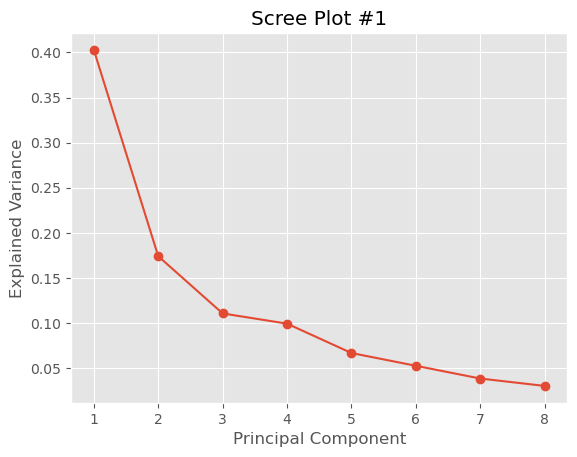

In [42]:
# visualize the data
explained_variance = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot #1')
plt.show()